## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train ), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [371]:
print(x_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


In [372]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


### Find dimensions of an image in the dataset

In [373]:
type(x_train[0])
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [375]:
x_test.shape
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train= x_train/255
x_test= x_test/255






In [0]:
# trainY = tf.keras.utils.to_categorical(y_test_nor, num_classes=10)
# testY = tf.keras.utils.to_categorical(y_train_nor, num_classes=10)

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
#tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

# #Reshape data from 2D (28,28) to 3D (28, 28, 1)
# model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))


x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')


x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')



In [378]:
x_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
#Add first convolutional layer
# import keras

# model.add(tf.keras.layers.Conv2D(32, #Number of filters 
#                                  kernel_size=(3,3), #Size of the filter
#                                  activation='relu'))

# #Add second convolutional layer
# model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
# model.add(tf.keras.layers.Dense(128, activation='relu'))



### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
# model.output
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))






In [368]:
es=keras.callbacks.EarlyStopping(monitor='categorical_crossentropy', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=[es])



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59680/60000 [============================>.] - ETA: 0s - loss: 0.3661 - acc: 0.8670

W0818 11:38:43.173763 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 139us/sample - loss: 0.3661 - acc: 0.8669 - val_loss: 0.3327 - val_acc: 0.8756
Epoch 2/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.2276 - acc: 0.9158

W0818 11:38:51.169217 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 133us/sample - loss: 0.2278 - acc: 0.9158 - val_loss: 0.2485 - val_acc: 0.9092
Epoch 3/10
59584/60000 [============================>.] - ETA: 0s - loss: 0.1647 - acc: 0.9388

W0818 11:38:59.146766 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 133us/sample - loss: 0.1651 - acc: 0.9387 - val_loss: 0.2528 - val_acc: 0.9093
Epoch 4/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.1162 - acc: 0.9564

W0818 11:39:07.076254 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 132us/sample - loss: 0.1161 - acc: 0.9564 - val_loss: 0.2560 - val_acc: 0.9149
Epoch 5/10
59680/60000 [============================>.] - ETA: 0s - loss: 0.0768 - acc: 0.9717

W0818 11:39:15.009418 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 132us/sample - loss: 0.0767 - acc: 0.9717 - val_loss: 0.3352 - val_acc: 0.9061
Epoch 6/10
59584/60000 [============================>.] - ETA: 0s - loss: 0.0521 - acc: 0.9805

W0818 11:39:22.973769 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 133us/sample - loss: 0.0520 - acc: 0.9806 - val_loss: 0.3628 - val_acc: 0.9131
Epoch 7/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0372 - acc: 0.9872

W0818 11:39:30.910736 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 132us/sample - loss: 0.0372 - acc: 0.9872 - val_loss: 0.3828 - val_acc: 0.9195
Epoch 8/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.0273 - acc: 0.9898

W0818 11:39:38.874710 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 133us/sample - loss: 0.0274 - acc: 0.9897 - val_loss: 0.4482 - val_acc: 0.9155
Epoch 9/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.0213 - acc: 0.9923

W0818 11:39:46.803385 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 132us/sample - loss: 0.0215 - acc: 0.9922 - val_loss: 0.4898 - val_acc: 0.9103
Epoch 10/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.0184 - acc: 0.9938

W0818 11:39:54.708064 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 132us/sample - loss: 0.0184 - acc: 0.9938 - val_loss: 0.5616 - val_acc: 0.9089



### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
# tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data

model2 = tf.keras.models.Sequential()
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')
# #Add 1st convolutional layer
model2.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))
# #Add second convolutional layer
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))



In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [389]:
# es=keras.callbacks.EarlyStopping(monitor='categorical_crossentropy', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

# model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=[es])

model2

In [0]:
 es=keras.callbacks.EarlyStopping(monitor='categorical_crossentropy', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [391]:

model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=[es])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59744/60000 [============================>.] - ETA: 0s - loss: 0.3948 - acc: 0.8576

W0818 11:49:36.743772 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 135us/sample - loss: 0.3946 - acc: 0.8576 - val_loss: 0.2966 - val_acc: 0.8913
Epoch 2/10
59552/60000 [============================>.] - ETA: 0s - loss: 0.2636 - acc: 0.9031

W0818 11:49:44.345074 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 127us/sample - loss: 0.2636 - acc: 0.9031 - val_loss: 0.2662 - val_acc: 0.9000
Epoch 3/10
59584/60000 [============================>.] - ETA: 0s - loss: 0.2163 - acc: 0.9197

W0818 11:49:51.959882 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 127us/sample - loss: 0.2164 - acc: 0.9196 - val_loss: 0.2336 - val_acc: 0.9146
Epoch 4/10
59872/60000 [============================>.] - ETA: 0s - loss: 0.1811 - acc: 0.9320

W0818 11:49:59.860188 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 132us/sample - loss: 0.1813 - acc: 0.9319 - val_loss: 0.2439 - val_acc: 0.9119
Epoch 5/10
59776/60000 [============================>.] - ETA: 0s - loss: 0.1514 - acc: 0.9432

W0818 11:50:07.623970 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 129us/sample - loss: 0.1516 - acc: 0.9431 - val_loss: 0.2191 - val_acc: 0.9205
Epoch 6/10
59680/60000 [============================>.] - ETA: 0s - loss: 0.1314 - acc: 0.9503

W0818 11:50:15.487091 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 131us/sample - loss: 0.1317 - acc: 0.9502 - val_loss: 0.2433 - val_acc: 0.9142
Epoch 7/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.1117 - acc: 0.9571

W0818 11:50:23.352045 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 131us/sample - loss: 0.1118 - acc: 0.9571 - val_loss: 0.2513 - val_acc: 0.9197
Epoch 8/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.0962 - acc: 0.9637

W0818 11:50:31.144462 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 130us/sample - loss: 0.0961 - acc: 0.9637 - val_loss: 0.2603 - val_acc: 0.9228
Epoch 9/10
59872/60000 [============================>.] - ETA: 0s - loss: 0.0857 - acc: 0.9674

W0818 11:50:38.929229 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 130us/sample - loss: 0.0857 - acc: 0.9674 - val_loss: 0.2871 - val_acc: 0.9234
Epoch 10/10
59552/60000 [============================>.] - ETA: 0s - loss: 0.0747 - acc: 0.9724

W0818 11:50:46.789833 140515631581056 callbacks.py:1259] Early stopping conditioned on metric `categorical_crossentropy` which is not available. Available metrics are: loss,acc,val_loss,val_acc


60000/60000 [==============================] - 8s 131us/sample - loss: 0.0746 - acc: 0.9724 - val_loss: 0.2865 - val_acc: 0.9235


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)


#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

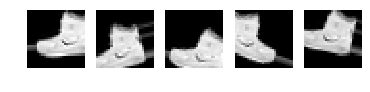

In [394]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [396]:
model2.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 1.0430 - acc: 0.6464
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6776 - acc: 0.7474
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6034 - acc: 0.7770
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5590 - acc: 0.7930
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5232 - acc: 0.8052
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5022 - acc: 0.8136
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4824 - acc: 0.8231
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4692 - acc: 0.8256
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4545 - acc: 0.8318
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4435 - acc: 0.8362


###  Report the final train and validation accuracy

In [0]:
model2.evaluvate(x_train,y_train, verbose=0)

In [0]:
model2.evaluvate(x_test,y_train, verbose=0)

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras import backend as K
%matplotlib inline
import os

### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train ), (x_test, y_test) = cifar10.load_data()

In [444]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [445]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
transform_fn = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=0.3)
x_train = x_train/255


print(


### **Prepare/fit the generator.**

In [0]:
transform_fn.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

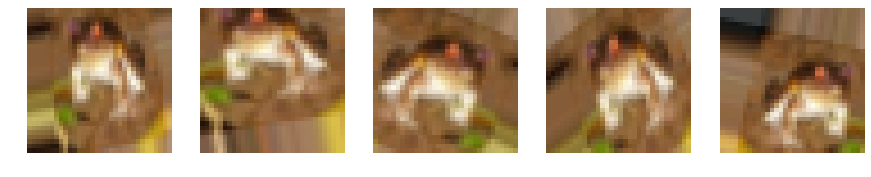

In [448]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))

gen = transform_fn.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()